## Rest-To-Rest Joint Trajectory
Computes and plot a *Rest-To-Rest* joint trajectory.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

We define a function that generates a rest-to-rest joint trajectory using cubic polynomials:

$q_s = q_i + (3s^2 - 2s^3) * (q_f - q_i)$ 

$q'_s = (6s - 6s^2) * (q_f - q_i)$

$q''_s = (6 - 12s) * (q_f - q_i)$

**Parameters:**

$q_i$ (np.array): Initial joint positions.

$q_f$ (np.array): Final joint positions.

$s$ (float): parameterized time law ($0 \leq s \leq 1$)

**Returns:**

Value $q_s$ of the trajectory at actual time step and derivatives $q'_s$ and $q''_s$. 

In [9]:
def rest_to_rest_joint_trajectory(qi, qf, s):
    if s < 0 or s > 1:
        raise ValueError("s must be in the range [0, 1]")

    return qi + (3 * s**2 - 2 * s**3) * (qf - qi), (6 * s - 6 * s**2) * (qf - qi), (6 - 12 * s) * (qf - qi)

We define $q_i$, $q_f$, the total time of the trajectory in seconds $T$, and the number of steps `num_steps`:

In [10]:
qi = np.array([0.0])

qf = np.array([2.0])

T = 3.

num_steps = 1000
dt = T / num_steps

We *unroll* the trajectory and its derivatives:

In [13]:
qtrj = []
qdottrj = []
qddottrj = []
for step in range(num_steps + 1):
    t = step * dt
    s = t / T
    q, qdot, qddot = rest_to_rest_joint_trajectory(qi, qf, s)
    print(f"Time: {t:.2f} , s: {s}, Joint Position: {q} [rad], Velocity: {qdot} [rad/s], Accelereation: {qddot} [rad/s²]")
    qtrj.append(q)
    qdottrj.append(qdot)
    qddottrj.append(qddot)

Time: 0.00 , s: 0.0, Joint Position: [0.] [rad], Velocity: [0.] [rad/s], Accelereation: [12.] [rad/s²]
Time: 0.00 , s: 0.001, Joint Position: [5.996e-06] [rad], Velocity: [0.011988] [rad/s], Accelereation: [11.976] [rad/s²]
Time: 0.01 , s: 0.002, Joint Position: [2.3968e-05] [rad], Velocity: [0.023952] [rad/s], Accelereation: [11.952] [rad/s²]
Time: 0.01 , s: 0.0030000000000000005, Joint Position: [5.3892e-05] [rad], Velocity: [0.035892] [rad/s], Accelereation: [11.928] [rad/s²]
Time: 0.01 , s: 0.004, Joint Position: [9.5744e-05] [rad], Velocity: [0.047808] [rad/s], Accelereation: [11.904] [rad/s²]
Time: 0.01 , s: 0.005, Joint Position: [0.0001495] [rad], Velocity: [0.0597] [rad/s], Accelereation: [11.88] [rad/s²]
Time: 0.02 , s: 0.006000000000000001, Joint Position: [0.00021514] [rad], Velocity: [0.071568] [rad/s], Accelereation: [11.856] [rad/s²]
Time: 0.02 , s: 0.007, Joint Position: [0.00029263] [rad], Velocity: [0.083412] [rad/s], Accelereation: [11.832] [rad/s²]
Time: 0.02 , s: 0

We plot the computed trajectories:

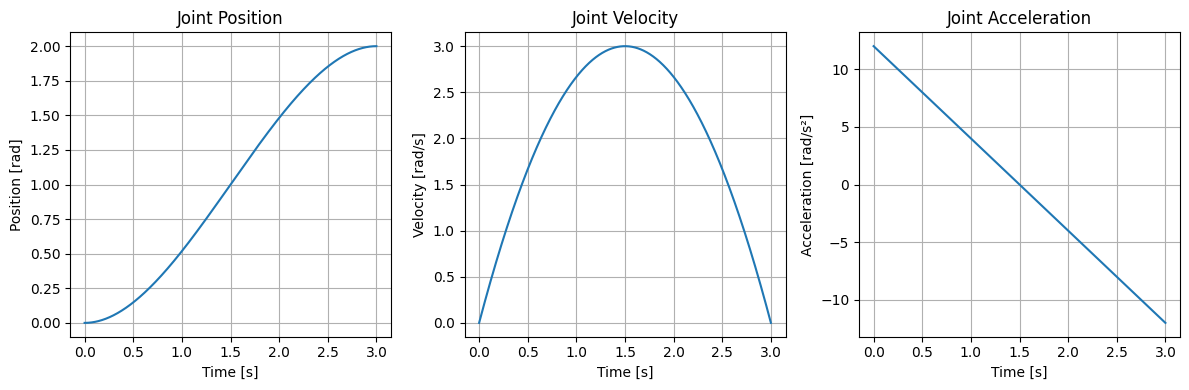

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(np.linspace(0, T, num_steps + 1), qtrj)
axes[0].set_title('Joint Position')
axes[0].set_xlabel('Time [s]')
axes[0].set_ylabel('Position [rad]')
axes[0].grid(True)

axes[1].plot(np.linspace(0, T, num_steps + 1), qdottrj)
axes[1].set_title('Joint Velocity')
axes[1].set_xlabel('Time [s]')
axes[1].set_ylabel('Velocity [rad/s]')
axes[1].grid(True)

axes[2].plot(np.linspace(0, T, num_steps + 1), qddottrj)
axes[2].set_title('Joint Acceleration')
axes[2].set_xlabel('Time [s]')
axes[2].set_ylabel('Acceleration [rad/s²]')
axes[2].grid(True)

plt.tight_layout()
plt.savefig("rest_to_rest_joint_trajectory.pdf")
plt.show()